In [116]:
import os 
from PIL import Image # python image library for image operation
import cv2 # opencv to resize image
import numpy as np
import matplotlib.pyplot as plt # for visualizing
import pandas as pd
from keras.utils.np_utils import to_categorical # to categories the dataset
from sklearn.model_selection import train_test_split # to split the dataset


In [128]:
def dataset_loader(directory, size, sigmax=10):
    IMAGE = []
    read = lambda image_name: np.asarray(Image.open(image_name).convert('RGB'))
    for image in (os.listdir(directory)):
        PATH = os.path.join(directory, image)
        _, ftype = os.path.splitext(PATH)
        if ftype == '.png':
            img = read(PATH)
            img = cv2.resize(img, (size, size))
            IMAGE.append(np.array(img))
    return IMAGE

In [129]:
# loading the traning data
bening_train = np.array(dataset_loader('F:/breast_cancer/Bening/train', 224))
malignant_train = np.array(dataset_loader('F:/breast_cancer/Malignant/train', 224))

In [130]:
# loading the test data
bening_test = np.array(dataset_loader('F:/breast_cancer/Bening/test', 224))
malignant_test = np.array(dataset_loader('F:/breast_cancer/Malignant/test', 224))

In [131]:
# created numpy array of zeros and ones for labeling
bening_train_label = np.zeros(len(bening_train))
bening_test_label = np.zeros(len(bening_test))
malignant_train_label = np.ones(len(malignant_train))
malignant_test_label = np.ones(len(malignant_test))

In [132]:
# concatenet the traing and testing data
X_train = np.concatenate((bening_train, malignant_train), axis=0)
Y_train = np.concatenate((bening_train_label, malignant_train_label), axis=0)
X_test = np.concatenate((bening_test, malignant_test), axis=0)
Y_test = np.concatenate((bening_test_label, malignant_test_label), axis=0)


In [133]:
# random positioning traning array
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

In [134]:
# random positioning test array
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

In [135]:
# diving the Y(train, test) data into two categories
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

In [136]:
# split the dataset into traning and testing
x_train, x_test, y_train, y_test = train_test_split(
X_train, Y_train, test_size=0.2, random_state = 15)


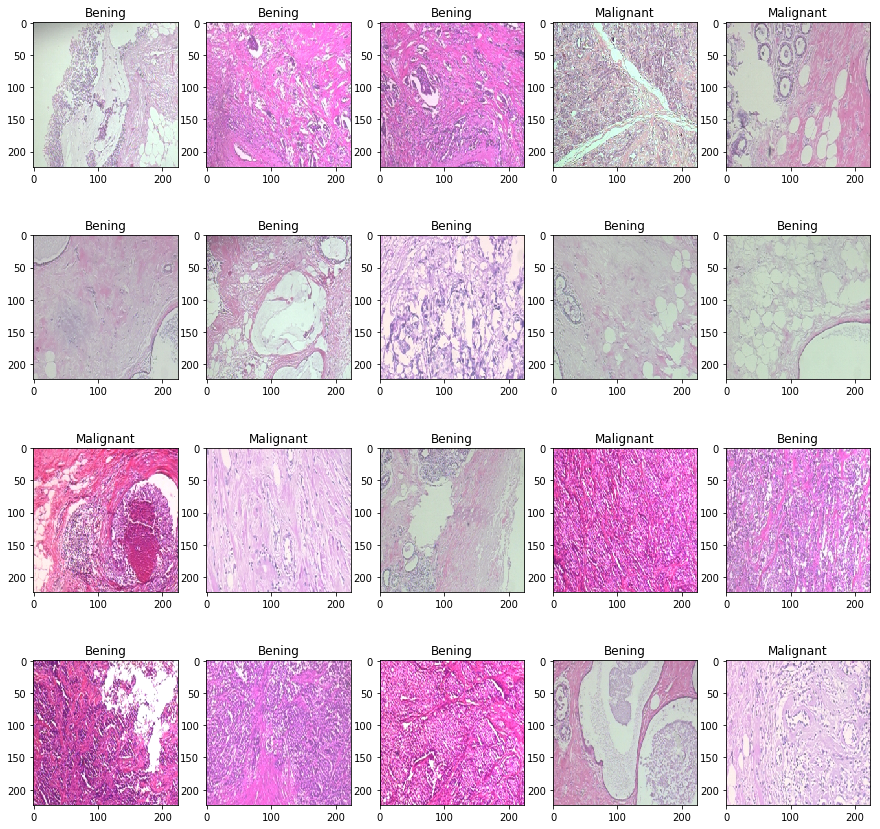

In [140]:
#weight, height = 60, 40
fig = plt.figure(figsize= (15, 15))
columns, rows = 5,4
for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Bening')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')
plt.show()